In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt

import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save
%matplotlib inline

In [2]:
year='2018'
hists = load('darkhiggs'+year+'.scaled')

In [3]:
data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']

In [16]:
for i in data_hists['template'].identifiers('region'):
    print (i)

gcr
sr
tecr
tmcr
wecr
wmcr
zecr
zmcr


In [108]:
import re
for p in data_hists['template'].identifiers('process'):
    p=str(p)
    p[p.find("(")+1:p.find(")")]
    print(p, type(p))

MET <class 'str'>
EGamma <class 'str'>


In [65]:
for process in signal_hists['template'].identifiers('process'):
    x = signal_hists['j1pt'].integrate('process', process).integrate('region').integrate('gentype').sum('j1pt').values()[()]
    print(p, "=", x)

EGamma = 4706.484077197353
EGamma = 4015.018510943218
EGamma = 3535.7466362808564
EGamma = 36265.067880553346
EGamma = 768.5494198979898
EGamma = 242.79456799723175


control region = gcr
sr
tecr
tmcr
wecr
wmcr
zecr
zmcr, systematic = nominal, sum variable  gentype

expected (MC) bkg = 684550.2145649135
expected signal =  0.0

expected total (bkg + sig)= 684550.2145649135


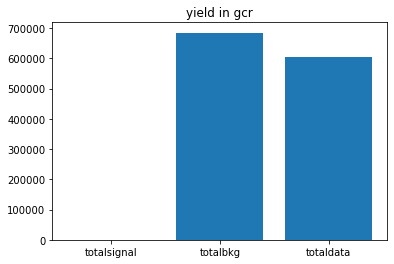

expected (MC) bkg = 248204.71964601494
expected signal =  0.0

expected total (bkg + sig)= 248204.71964601494


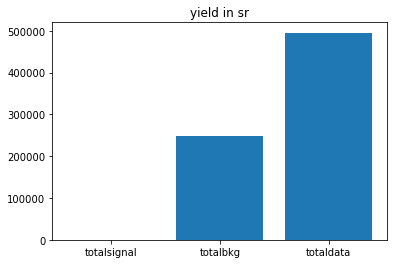

expected (MC) bkg = 25557.908416697515
expected signal =  0.0

expected total (bkg + sig)= 25557.908416697515


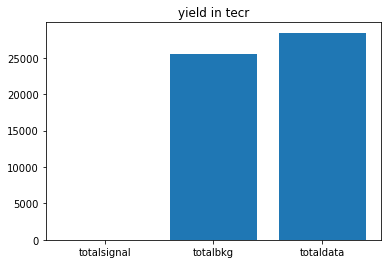

expected (MC) bkg = 56019.427267097824
expected signal =  0.0

expected total (bkg + sig)= 56019.427267097824


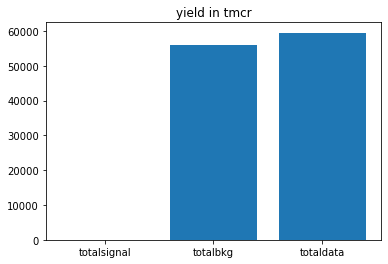

expected (MC) bkg = 185716.65723950745
expected signal =  0.0

expected total (bkg + sig)= 185716.65723950745


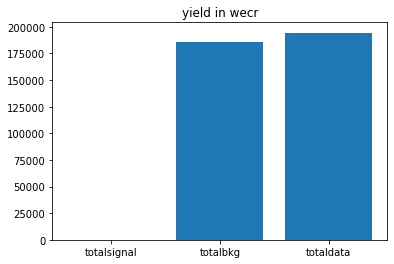

expected (MC) bkg = 424339.3890965069
expected signal =  0.0

expected total (bkg + sig)= 424339.3890965069


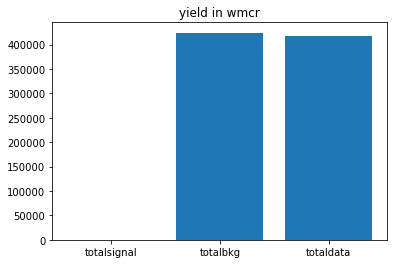

expected (MC) bkg = 37849.92732468369
expected signal =  0.0

expected total (bkg + sig)= 37849.92732468369


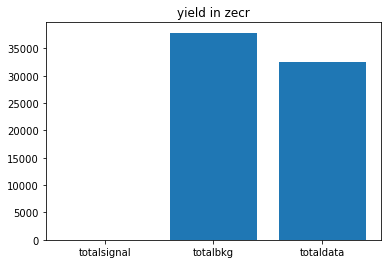

expected (MC) bkg = 47404.78220385778
expected signal =  0.0

expected total (bkg + sig)= 47404.78220385778


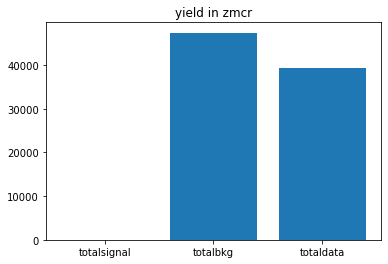

In [140]:
#let's find the total number events in backgound with nominal systematics by summing over "gentype variable"
for region in data_hists['template'].identifiers('region'):
    region = region
    plot_dict = {}
    total_bkg = 0.0
    total_sig = 0.0
    for p in bkg_hists['template'].identifiers('process'):
        arr_bkg = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()
        arr_sig = signal_hists['template'].integrate('region', region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()

        if () in arr_bkg:
            total_bkg += bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()[()].sum()


        if () in arr_sig:
            total_sig += signal_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()[()].sum()
    print("expected (MC) bkg = {}\nexpected signal =  {}\n\nexpected total (bkg + sig)= {}".format(total_bkg, total_sig, total_bkg+total_sig))


    total_data = 0.0
    for p in data_hists['template'].identifiers('process'):
        arr_data = data_hists['template'].integrate('region', region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()

        if () in arr_data:
            total_data += data_hists['template'].integrate('region', region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()[()].sum()

#     print("total number of events observed (data)(MET + EGamma) {}".format(total_data))
    plot_dict['totalsignal'] = total_sig
    plot_dict['totalbkg'] = total_bkg
    plot_dict['totaldata'] = total_data
    
    plt.bar(range(len(plot_dict)), list(plot_dict.values()), align='center')
    plt.xticks(range(len(plot_dict)), list(plot_dict.keys()))
    plt.title("yield in {}".format(region))

    plt.show()

**Signal samples for 2018 What happened to them**
**Is it because of the definition of my CR?**


### Things to do
**1. - [X] Create a stack bar plot for the contribution of each background in each region**

**2. I have to study from low pT W-jets samples as they have not been studied for the current mono-top anaylysis**

        a. I have the sample names, they are MINIAOD, they need to be processed to nanoAOD using the nanoAod harvester
        b. then after processing make histograms using Coffea plotting tools

**3. The objective is to make gen-level cuts to merge lowpT and high pt sample**
        
        a. What could be the motivation behind this merge?
        b. what are gen-level cuts?
        c. What is the difference between gen-level and reconstruction level Quantities?

**4. What is the difference between Jet_Ht and Jet_pt? and what is the process Hs->bb ( I understand what H->bb is)?**

**5. Ask that question about DAS-> rootfile-> your jupyter NB**

In [141]:
plot_dict

{'totalsignal': 0.0, 'totalbkg': 47404.78220385778, 'totaldata': 39250.0}

<Figure size 640x480 with 0 Axes>

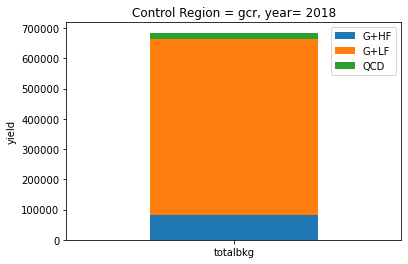

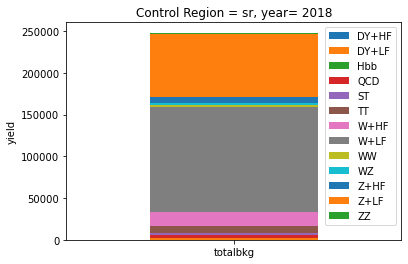

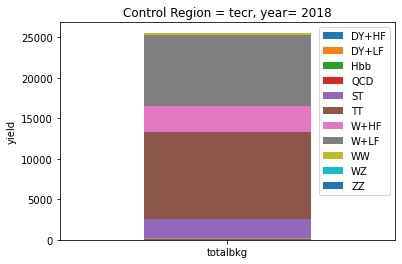

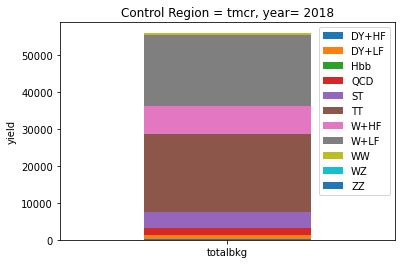

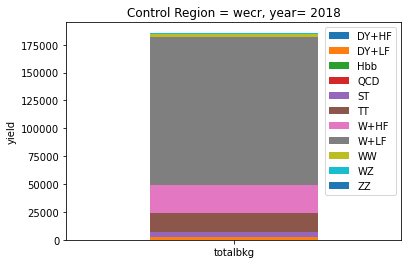

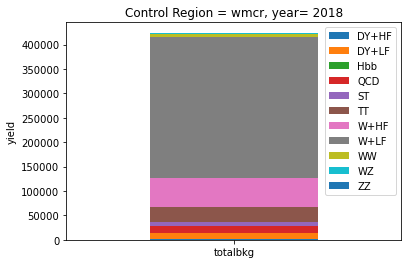

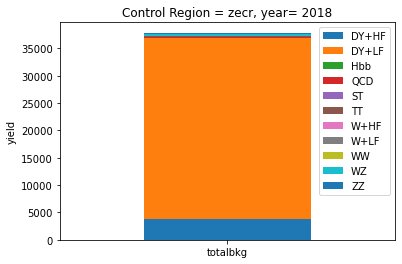

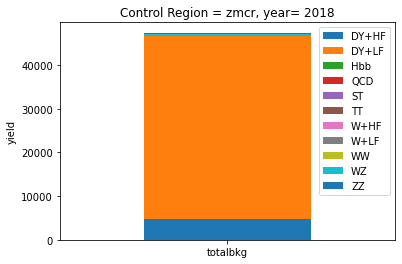

In [145]:
import pandas as pd
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for region in data_hists['template'].identifiers('region'):
    
    region = region
    plot_dict1 = {}
    bkg_count = {}
    # total_bkg = 0.0
    total_sig = 0.0
    for p in bkg_hists['template'].identifiers('process'):
        arr_bkg = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()
        arr_sig = signal_hists['template'].integrate('region', region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()

        if () in arr_bkg:
            d=str(p)
            d[d.find("(")+1:d.find(")")]

            bkg_count[d] = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic','nominal').sum('gentype').values()[()].sum()



            plot_dict1['totalbkg'] = bkg_count

    df = pd.DataFrame(plot_dict1).transpose()
    df.plot(kind='bar', stacked=True)
    plt.title('Control Region = {}, year= {}'.format(region, '2018'))
    plt.xticks(rotation=0)
    plt.ylabel('yield')
    plt.savefig("/home/rishabh/Documents/mono-top/monotop-plotting/plot/stacked_bkg_2018/{}".format(region))

In [ ]:
#To optimize cuts based on process yield, i.e. you wanna test some background rejection
# calculate S/sqrt(B)
